In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:
df = pd.read_csv("C:\\Users\\Sanket\\Desktop\\Data Analyst\\Web scraaping\\table_22.csv")


In [23]:
df

,Constituency no.,District,Constituency name,Winner candidate,Winner party,Winner votes,Winner %,Runner Up Cadidate,Runner Up party,Runner Up votes,Runner Up %,Margin,Alliance
0,1,Nandurbar district,Akkalkuwa (ST),Aamshya Padavi,SHS,72629,31.55,Kagda Chandya Padvi,INC,69725,30.29,2904,Maha Yuti
1,2,Nandurbar district,Shahada (ST),Rajesh Padvi,BJP,146839,59.86,Rajendrakumar Gavit,INC,93635,38.17,53204,Maha Yuti
2,3,Nandurbar district,Nandurbar (ST),Vijaykumar Gavit,BJP,155190,64.62,Kiran Damodar Tadavi,INC,78943,32.87,76247,Maha Yuti
3,4,Nandurbar district,Navapur (ST),Shirishkumar Naik,INC,87166,36.14,Sharad Gavit,IND,86045,35.67,1121,Maha Vikas Aghadi
4,5,Dhule district,Sakri (ST),Manjula Gavit,SHS,104649,43.20,Pravin Bapu Chaure,INC,99065,40.89,5584,Maha Yuti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,284,Sangli,Shirala,Satyajit Deshmukh,BJP,130738,53.61,Mansing Naik,NCP-SP,108049,44.31,22689,Maha Yuti
284,285,Sangli,Palus-Kadegaon,Vishwajeet Kadam,INC,130769,55.88,Sangram Deshmukh,BJP,100705,43.03,30064,Maha Vikas Aghadi
285,286,Sangli,Khanapur,Suhas Babar,SHS,153892,61.14,Vaibhav Patil,NCP-SP,75711,30.08,78181,Maha Yuti
286,287,Sangli,Tasgaon,Rohit Patil,NCP-SP,128403,54.09,Sanjaykaka Patil,NCP,100759,42.45,27644,Maha Vikas Aghadi


In [48]:
total_Constituency = df['Constituency no.'].count()
total_Constituency

288

Alliance count

In [33]:
alliance_counts = df['Alliance'].value_counts()
print(unique_alliances)


Alliance
Maha Yuti            234
Maha Vikas Aghadi     50
Other                  4
Name: count, dtype: int64


In [51]:

alliance_parties = df[['Alliance', 'Winner party']].drop_duplicates()

fig = px.treemap(alliance_parties, 
                 path=['Alliance', 'Winner party'], 
                 title='Treemap of Alliances and Their Parties')

fig.show()


In [70]:

alliance_winners = df[['Alliance', 'Winner party']]

winner_counts = alliance_winners.groupby(['Alliance', 'Winner party']).size().reset_index(name='Winner Count')

fig = px.treemap(winner_counts, 
                 path=['Alliance', 'Winner party'],  # Hierarchy: Alliance > Party
                 values='Winner Count',  # Block size based on winner count
                 title='Treemap of Alliances with Total Winners by Party')

fig.update_traces(textinfo="label+value", 
                  texttemplate="%{label}<br>%{value} Winners")

fig.show()


# visualization in pie chart

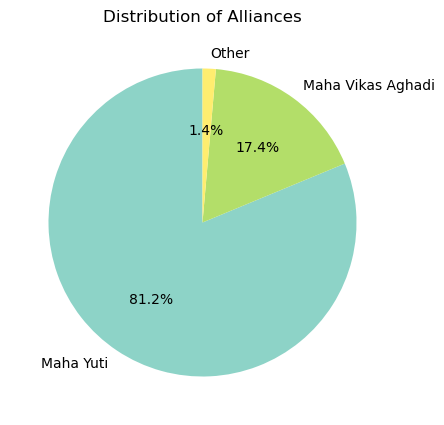

In [37]:
plt.figure(figsize=(5, 5))
alliance_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Alliances')


plt.ylabel('')  
plt.show()

In [77]:

district_alliance_winners = df.groupby(['District', 'Alliance']).size().reset_index(name='Winner Count')

fig = px.bar(district_alliance_winners, 
             x='District', 
             y='Winner Count', 
             color='Alliance', 
             title='Winners by District and Alliance', 
             text='Winner Count')

fig.update_layout(
    xaxis_title='District',
    yaxis_title='Number of Winners',
    legend_title='Alliance',
    barmode='stack'
)

fig.show()


C:\Users\Sanket\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

